<center><h3>Régression linéaire multiple<h3></center>

In [2]:
#Importation des bibiotheques

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

In [3]:
PositionSalary = pd.read_csv("./../../Datasets/Position_Salaries.csv")

PositionSalary.head(5)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


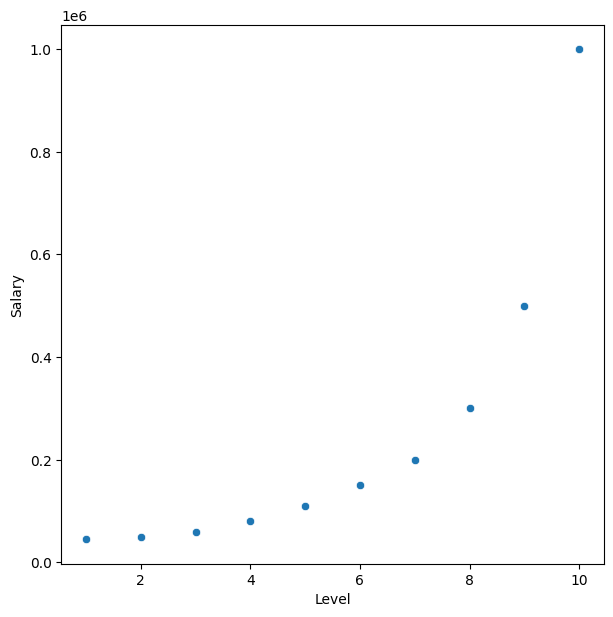

In [4]:

plt.figure(figsize=(7,7))
sns.scatterplot(x=PositionSalary["Level"] , y=PositionSalary["Salary"] )
plt.show()


In [5]:
print(PositionSalary["Position"].isna().sum())
print(PositionSalary["Level"].isna().sum())
print(PositionSalary["Salary"].isna().sum())

0
0
0


In [6]:
PositionSalary.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [7]:
#Faisons le label encoder sur le données categorielles identifiés par la colonne Position
"""
On a pas besoin d'encoder la colonne Position car on peut faire une correspondance avec la colonne 
Level , ainsi on va considerer uniquement les colonnes Levels et Salary comme jeu de données réels
"""
PositionSalary

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [8]:
X_dataset = PositionSalary.iloc[:, 1:2].values
Y_datset  = PositionSalary.iloc[:, 2].values
X_dataset

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

<center>Prétraitement des données</center>

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, Y_datset, test_size=0.1, random_state=0)


comme les données ne sont qu'au nombre entrainons le modele sur le dataset entier.

In [10]:
X_train = X_dataset
y_train = Y_datset

In [11]:
regressor = LinearRegression()

regressor.fit(X_train, y_train)



LinearRegression()

Appliquons d'abord la regression linéaire simple

In [12]:
y_pred = regressor.predict(X_test)
print(y_pred)
print(y_test)

[47303.03030303]
[60000]


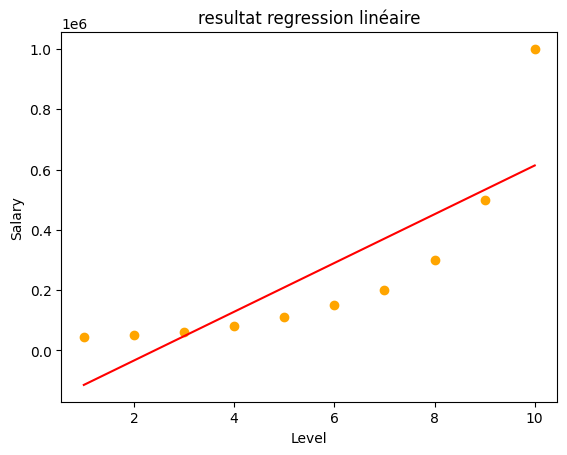

In [13]:
#Visualisation

plt.scatter(x=X_train, y=y_train, color="orange")
plt.plot(X_train, regressor.predict(X_train), color="red")
plt.title("resultat regression linéaire")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

Rgression polynamiale

<center>Transformer d'abord la matrice de données au dégré du polynime souhaité</center>

In [14]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_transformer_data = PolynomialFeatures(degree=4)
X_polynomiale = polynomial_transformer_data.fit_transform(X_train)

X_polynomiale

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

Appliquons la regression lineaire sur les données polynomiales X_polynomiale

In [15]:
"""
on cree une matrice 
la premiere colone de 1 represente la constante X0 utilisé dans le BaxkWard élimination pour dotér la
variable b0 q'une variable dependante x0.
la troisieme colonne est juste le carré de la colonne level du dataset. 
ainsi on aura un polynome de degré 2 car la troisieme colonne de la matrice est au carré , la deuxieme au premier degré et la premiere une constante.
"""

"\non cree une matrice \nla premiere colone de 1 represente la constante X0 utilisé dans le BaxkWard élimination pour dotér la\nvariable b0 q'une variable dependante x0.\nla troisieme colonne est juste le carré de la colonne level du dataset. \nainsi on aura un polynome de degré 2 car la troisieme colonne de la matrice est au carré , la deuxieme au premier degré et la premiere une constante.\n"

In [16]:
poly_regressor = LinearRegression()

poly_regressor.fit(X_polynomiale, y_train)

# y = poly_regressor.predict(X_test)

# print(y)
# print(y_test)

LinearRegression()

In [17]:
y_predict = poly_regressor.predict(polynomial_transformer_data.fit_transform(X_test))

print(y_predict)
print(y_test)

[58642.1911421]
[60000]


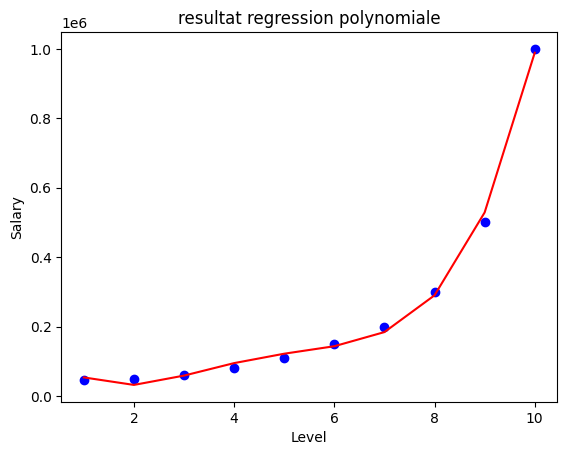

In [18]:
#Visualisation

plt.scatter(x=X_train, y=y_train, color="blue")
plt.plot(X_train, poly_regressor.predict(polynomial_transformer_data.fit_transform(X_train)), color="red")
plt.title("resultat regression polynomiale")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

<center><h1>Comparons ces deux modeles </h1></center>

In [19]:
PositionSalary

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


essayons de predire le salaire de niveau(level) 6.5

In [25]:
#Regression linéaire simple

new_prediction_1 = regressor.predict([[6.5]])
print(f"Prediction avec le regression linéeaire simple est de {new_prediction_1}")
new_prediction_2 = poly_regressor.predict(polynomial_transformer_data.fit_transform([[6.5]]))
print("la prediction avec la regression polynomiale est de {}".format(new_prediction_2))

Prediction avec le regression linéeaire simple est de [330378.78787879]
la prediction avec la regression polynomiale est de [158862.45265155]


=On voit bien que la regression polynomiale trouve de resultats acceptables d'apres le tableau du dataset contrairement a la regression simple.
